# Lab 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
%matplotlib inline

### Clustering coefficient

During the lecture we have understood, that the clustering coefficient of a random graph is equal to the probability $p$: $$\text{Clustering coefficient} = \frac{\langle k \rangle}{n} = p $$
In this task you have to check it on generated data. Please, generate $100$ Random Graphs with $n = 1000$ and $p = 0.002$ (for saving computational time) and plot the box-plot of your computations.

In [2]:
# Generating graphs

n = 1000  # number of nodes
p = 0.002 # probability of an edge

graphs = []
for i in range(1,101):
    graphs.append(nx.gnp_random_graph(n, p))

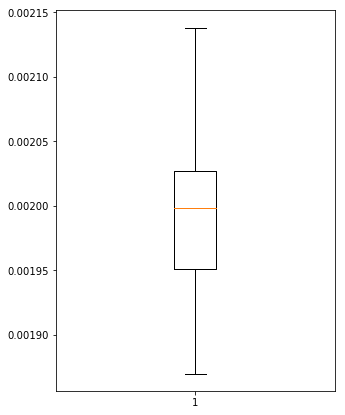

In [3]:
# Plotting the box-plot

# list of clustering coefficients for all graphs
cc = [np.mean(g.degree().values())/n for g in graphs]

fig = plt.figure(1, figsize = (5,7))
ax = fig.add_subplot(111)
bp = ax.boxplot(cc)

### Size of small components

In this task you are asked to calculate the average size of small components (small component = not a giant one) with regard to average degree of the network. To see the effect clearly, plot average size around $\langle k \rangle = 1$.

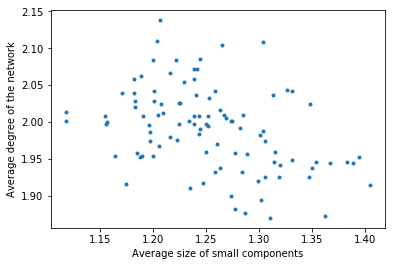

In [4]:
# Computing average size of small components

small_sizes = [] # list of average sizes of small components of the networks
av_degrees  = [] # list of average degrees of the networks

for g in graphs:
    # sorted list of all connected components in a graph, GCC is first
    components = sorted(nx.connected_component_subgraphs(g), key=len, reverse=True)
    
    sizes = [] # list of sizes of all small components of the network
    # for all components excluding the GCC:
    for c in components[1:]:
        sizes.append(c.number_of_nodes()) # size of small component
             # or should it be c.size()? Results are similar anyway
    small_sizes.append(np.mean(sizes))
    
    av_degrees.append(np.mean(g.degree().values()))
    
# Plotting the results

plt.plot(small_sizes, av_degrees, '.')
plt.xlabel('Average size of small components')
plt.ylabel('Average degree of the network')

### Average path length and transitivity

Plot the average path length and transitivity coefficents with $n=1000$ and p=0.001 while increasing by 0.003

In [31]:
# Function for average path length
def apl(g):
    """Return average shortest path length of a graph"""
    components = list(nx.connected_component_subgraphs(g))
    g_apl = [] # shortest path lengths in a graph
    for c in components:
        s = nx.shortest_path_length(c) # dict of dicts with path[source][target] = shortest_path_length
        for i in s.values():
            for j in i.values():
                g_apl.append(j)
    return np.mean(g_apl)

In [56]:
# Computing data

n1 = 1000      # number of nodes
graphs1 = []
probs = []     # list of probabilities p
rstart = 0.001 # range start
rend = 0.1     # range end
rstep = 0.003  # range step

for p1 in np.arange(rstart, rend, rstep):
    graphs1.append(nx.gnp_random_graph(n1, p1))
    probs.append(p1)

av_path_len = list(apl(g) for g in graphs1)       # average path lengths
trans = list(nx.transitivity(g) for g in graphs1) # transitivity coefficients

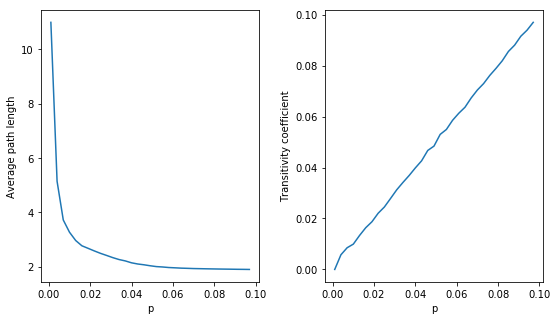

In [57]:
# Plotting

plt.figure(1, figsize = (9, 5))
plt.subplots_adjust(wspace = 0.3)

plt.subplot(121)
plt.plot(probs, av_path_len)
plt.xlabel('p')
plt.ylabel('Average path length')

plt.subplot(122)
plt.plot(probs, trans)
plt.xlabel('p')
plt.ylabel('Transitivity coefficient')